<a href="https://colab.research.google.com/github/conradoov/formacao_machine_learning_alura/blob/main/introducao_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formação Machine Learning - Curso 1: Introdução

### Introdução ao curso

In [108]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [106]:
!pip install seaborn
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import numpy as np
#Configurando seed para todos
seed = 20
np.random.seed(seed)

Projeto 1 - Classificação entre porcos e cachorros:


*   Criação de bases de dados treino e teste
*   model.fit

*   model.predict
*   accuracy_score





In [2]:
#features (1 sim, 0 nao)
#pelo longo?
#perna curta?
# faz au au?
porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

In [3]:
treino_x = [porco1,porco2,porco3,cachorro1,cachorro2,cachorro3]
# 1 => porco / 2 => cachorro
treino_y = [1,1,1,0,0,0]

In [4]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC()

In [5]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0])

In [6]:
misterio1  = [1,1,1]
misterio2  = [1,1,0]
misterio3  = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0,1,1]
previsoes = model.predict(teste_x)

In [7]:
previsoes == teste_y

array([ True,  True, False])

In [8]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/total
print("Taxa de acerto", taxa_de_acerto*100)

Taxa de acerto 66.66666666666666


In [9]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(teste_y, previsoes)
print("Taxa de acerto => %.2f%%" % (accuracy_score*100))

Taxa de acerto => 66.67%


### Testes replicáveis, estratificação e obtendo dados da internet

Projeto 2 - Classificação de compras


*   Obtendo dados de URI
*   Separação aleatória utilizando sklearn
*   Conceitos de seed e stratify
*   DataFrame.rename()
*   uso de .value_counts()


In [10]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
df = pd.read_csv(uri)
df.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [11]:
mapa = {
    'home':'principal',
    'how_it_works':'como_funciona',
    'contact':'contato',
    'bought':'comprou'
}
df.rename(columns=mapa, inplace=True)

In [12]:
x = df[['principal','como_funciona','contato']]
y = df[['comprou']]

In [13]:
df.shape

(99, 4)

In [14]:
#Separando dados de treino e teste
from sklearn.model_selection import train_test_split

seed = 20


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        random_state = seed,
                                                        stratify = y)

print('O modelo foi treinado com %d elementos, sendo testado com %d elementos' %
      (len(treino_x), len(teste_x)))

O modelo foi treinado com 74 elementos, sendo testado com 25 elementos


In [15]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
previsoes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1])

In [16]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y, previsoes)
print('A acuracia foi %.2f%%' % (acuracia*100))

A acuracia foi 96.00%


In [17]:
treino_y.value_counts()

comprou
0          49
1          25
dtype: int64

In [18]:
teste_y.value_counts()

comprou
0          17
1           8
dtype: int64

### Um projeto de baixa dimensionalidade e o baseline

Projeto 3 - Modelo não linear:


*   Avaliandoi um modelo não linear em um algoritmo linear
*   Criando baseline predict para o modelo e comparando com o algoritmo linear
*   Gerando manualmente uma Decision Boundery para observar o comportamento do modelo linear



#### Avaliando projeto no modelo de classificação linear

In [19]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
df = pd.read_csv(uri)
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [20]:
mapa = {
    'unfinished':'nao_finalizado',
    'expected_hours':'horas_esperadas',
    'price':'preco'
}
df.rename(columns=mapa, inplace=True)
df.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [21]:
#swapping values
trocar = {
    0 : 1,
    1: 0
}
df['finalizado'] = df.nao_finalizado.map(trocar)

In [22]:
df.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


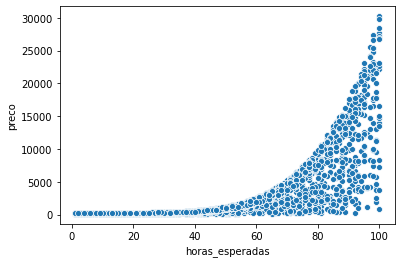

In [23]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y = 'preco', data=df)

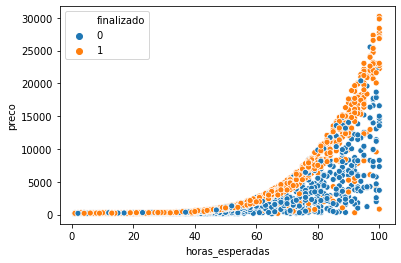

In [24]:
sns.scatterplot(x='horas_esperadas', y = 'preco', hue = 'finalizado',data=df)

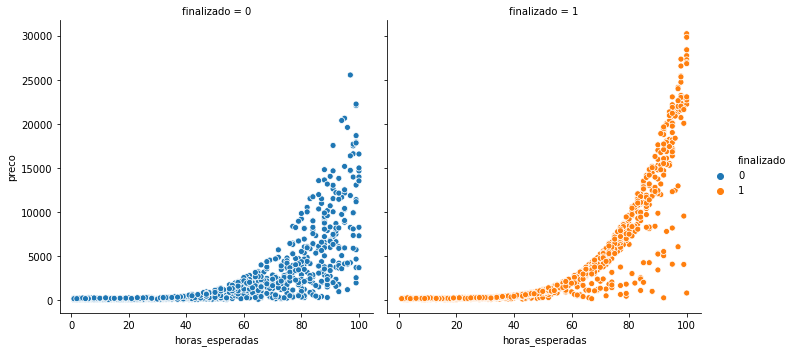

In [26]:
sns.relplot(x='horas_esperadas', y = 'preco', col = 'finalizado',hue = 'finalizado',data=df)

In [27]:
x = df[['horas_esperadas','preco']]
y = df['finalizado']

In [28]:
#Separando dados de treino e teste
from sklearn.model_selection import train_test_split

seed = 20


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        random_state = seed,
                                                        stratify = y)

print('O modelo foi treinado com %d elementos, sendo testado com %d elementos' %
      (len(treino_x), len(teste_x)))

O modelo foi treinado com 1617 elementos, sendo testado com 540 elementos


In [31]:
from sklearn.svm import LinearSVC

modelo = LinearSVC(random_state=seed)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [30]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y, previsoes)
print('A acuracia foi %.2f%%' % (acuracia*100))

A acuracia foi 52.96%


In [33]:
import numpy as np

previsoes_de_base = np.ones(540)
acuracia_baseline = accuracy_score(teste_y, previsoes_de_base)
print('A acuracia da previsao baseline foi %.2f%%' % (acuracia*100))

A acuracia da previsao baseline foi 52.96%


#### Curva de decisão

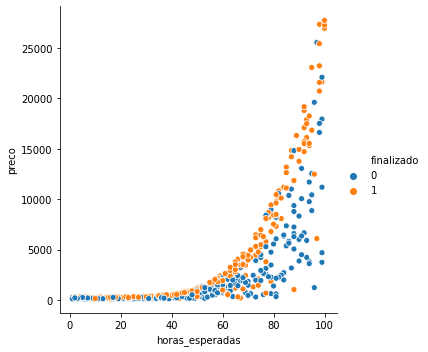

In [35]:
sns.relplot(x='horas_esperadas', y = 'preco', hue = teste_y, data=teste_x)

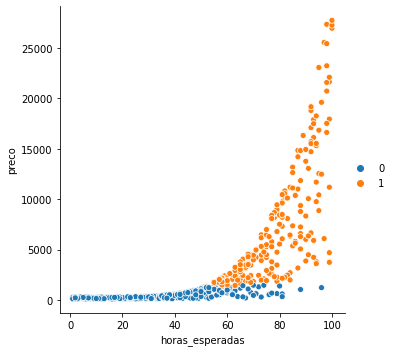

In [36]:
#Como o modelo está representando atualmente
sns.relplot(x='horas_esperadas', y = 'preco', hue = previsoes, data=teste_x)

In [39]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [44]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [47]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [52]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

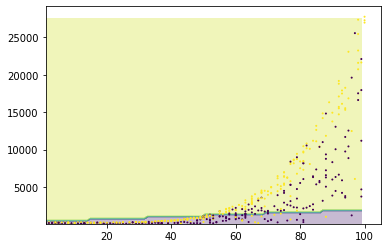

In [53]:
import matplotlib.pyplot as plt
#Decision Boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

### Suport Vector Machine e a não linearidade

Projeto 3 pt.2:


*   Utilizar o algoritmo de support vector machine
*   Melhorar a acurácia do modelo com um algoritmo não-linear



#### Novo modelo, capaz de criar uma curva e não uma classificação linear

##### Importando dados

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
df = pd.read_csv(uri)

mapa = {
    'unfinished':'nao_finalizado',
    'expected_hours':'horas_esperadas',
    'price':'preco'
}
df.rename(columns=mapa, inplace=True)

#swapping values
trocar = {
    0 : 1,
    1: 0
}
df['finalizado'] = df.nao_finalizado.map(trocar)

#Separando dados de treino e teste
seed = 20
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        random_state = seed,
                                                        stratify = y)

print('O modelo foi treinado com %d elementos, sendo testado com %d elementos' %
      (len(treino_x), len(teste_x)))

O modelo foi treinado com 1617 elementos, sendo testado com 540 elementos


##### Padronizando escala e testando algoritmo SVC

In [69]:
#Padronizando escala de valores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print('A acuracia foi %.2f%%' % (acuracia*100))

A acuracia foi 70.37%


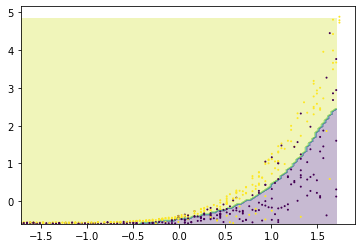

In [72]:
#Visualizando o resultado do algoritmo sklearn.SVC()
import matplotlib.pyplot as plt
import numpy as np
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

#Decision Boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

### Dummy classifiers e árvore de decisão

Projeto 4 - Venda de automóveis:


*   Classificadores Dummy
*   Aplicação do algoritmo DecisionTree
*   Visualização da árvore de decisão



#### Importando dados

In [79]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
df = pd.read_csv(uri)

mapa = {
    'mileage_per_year':'milhas_por_ano',
    'model_year':'ano_do_modelo',
    'price':'preco',
    'sold':'vendido'
}

df.rename(columns=mapa, inplace=True)

#swapping values
a_trocar = {
    'no' : 0,
    'yes': 1
}
df['vendido'] = df.vendido.map(a_trocar)

df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [81]:
from datetime import datetime
ano_atual = datetime.today().year
df['idade_do_modelo'] = ano_atual - df.ano_do_modelo
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [82]:
df['km_por_ano'] = df.milhas_por_ano * 1.60934
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [87]:
df.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1, inplace=True)
df.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [88]:
#Separando dados de treino e teste
seed = 20
x = df[['preco','idade_do_modelo','km_por_ano']]
y = df['vendido']
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        random_state = seed,
                                                        stratify = y)

print('O modelo foi treinado com %d elementos, sendo testado com %d elementos' %
      (len(treino_x), len(teste_x)))

O modelo foi treinado com 1617 elementos, sendo testado com 540 elementos


In [89]:
#Testando LinearSVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(raw_treino_x, treino_y)

previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print('A acuracia foi %.2f%%' % (acuracia*100))

A acuracia foi 58.40%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### Dummy Classifier

In [92]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(raw_treino_x, treino_y)

previsoes = dummy_stratified.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print('A acuracia do dummy_stratified foi %.2f%%' % (acuracia*100))

A acuracia do dummy_stratified foi 58.00%


In [97]:
from sklearn.dummy import DummyClassifier

dummy_mostFrequent = DummyClassifier(strategy = 'most_frequent')
dummy_mostFrequent.fit(raw_treino_x, treino_y)

previsoes = dummy_mostFrequent.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print('A acuracia do dummy_mostFrequent foi %.2f%%' % (acuracia*100))

A acuracia do dummy_mostFrequent foi 58.00%


In [99]:
#Testando LinearSVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(raw_treino_x, treino_y)

previsoes = modelo.predict(raw_teste_x)
score = modelo.score(raw_teste_x, teste_y)

acuracia = accuracy_score(teste_y, previsoes)
print('O score foi %.2f%%' % (score*100))

O score foi 42.76%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [101]:
#Testando SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC(gamma='auto')

#Padronizando escala de valores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
score = modelo.score(teste_x, teste_y)

acuracia = accuracy_score(teste_y, previsoes)
print('O score foi %.2f%%' % (score*100))

O score foi 75.92%


#### Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

modelo = DecisionTreeClassifier(max_depth=4)

modelo.fit(raw_treino_x, treino_y)

previsoes = modelo.predict(raw_teste_x)
score = modelo.score(raw_teste_x, teste_y)

acuracia = accuracy_score(teste_y, previsoes)
print('O score foi %.2f%%' % (score*100))

O score foi 78.32%


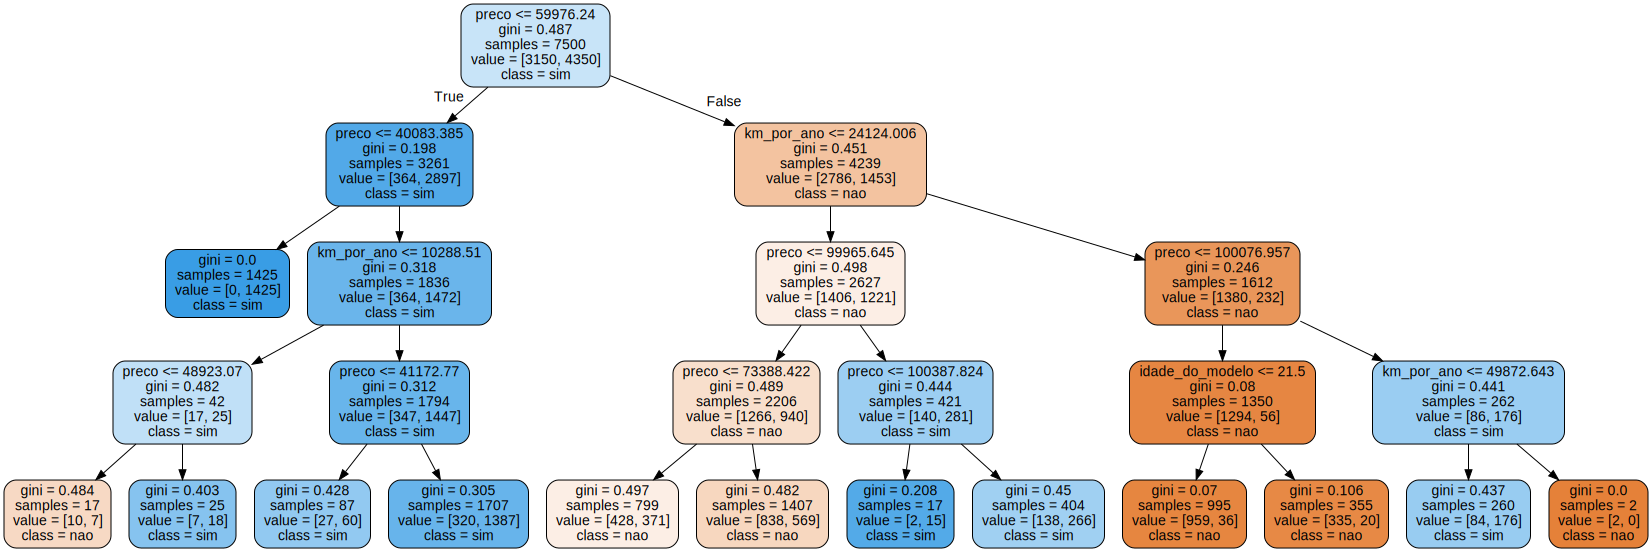

In [118]:
#Exportar a visualização gráfica da árvore de decisão
from sklearn.tree import export_graphviz
import graphviz
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           class_names = ['nao','sim'])
grafico = graphviz.Source(dot_data)
grafico